In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 线搜索方法

In [2]:
def unconstrained_optimize(f, x0, epsilon=1e-8, max_iter=1000):
    x = np.zeros((max_iter+1, x0.shape[0]))  # 定义 x 初始存储空间

    x[0] = x0
    for k in range(max_iter):
        d = search_desc_direction(f, x[k], ...)  # 确定下降方向

        def phi(alpha): return f(x[k] + alpha * d)
        alpha = search_step_length(phi, ...)  # 确定最优步长

        x[k+1] = x[k] + alpha * d

        # if np.linalg.norm(g(x[k+1])) <= epsilon:
        # if f(x[k]) - f(x[k+1]) <= epsilon:
        if np.linalg.norm(x[k] - x[k+1]) <= epsilon:
            break

    return x[k+1], f(x[k+1])

## 精确线搜索方法

为了更好地说明算法，我们考虑书中一道习题$$\phi(\alpha)=1-\alpha\mathrm{exp}\left(-\alpha^{2}\right)$$

In [3]:
def phi(alpha):
    return 1 - alpha * np.exp(- alpha ** 2)

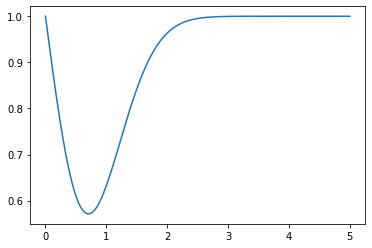

In [4]:
alphas = np.linspace(0, 5, 1000)
phis = phi(alphas)

plt.plot(alphas, phis)
plt.show()
# plt.savefig("./figures/exercise-2.8.png", dpi=300)

### 确定步长搜索区间

In [5]:
def search_unimodal_interval(phi, alpha0, gamma=0.1, t=2, max_iter=1000):
    alphas = np.zeros(max_iter + 1)

    alphas[0] = alpha0
    for i in range(max_iter):
        alphas[i+1] = alphas[i] + gamma

        print("Iter %02d: alpha %.2f, phi %.2f, gamma %.2f" %
              (i+1, alphas[i+1], phi(alphas[i+1]), gamma))
        if phi(alphas[i+1]) >= phi(alphas[i]) or alphas[i+1] <= 0:
            if i == 0:
                gamma = -gamma
                alpha = alphas[i+1]
            else:
                break
        else:
            gamma = t * gamma
            alpha = alphas[i]
            alphas[i] = alphas[i+1]

    return min(alpha, alphas[i+1]), max(alpha, alphas[i+1])

In [6]:
a, b = search_unimodal_interval(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))

Iter 01: alpha 0.10, phi 0.90, gamma 0.10
Iter 02: alpha 0.30, phi 0.73, gamma 0.20
Iter 03: alpha 0.70, phi 0.57, gamma 0.40
Iter 04: alpha 1.50, phi 0.84, gamma 0.80
Final interval is [0.30, 1.50]


In [7]:
a, b = search_unimodal_interval(phi, 1)
print("Final interval is [%.2f, %.2f]" % (a, b))

Iter 01: alpha 1.10, phi 0.67, gamma 0.10
Iter 02: alpha 1.00, phi 0.63, gamma -0.10
Iter 03: alpha 0.80, phi 0.58, gamma -0.20
Iter 04: alpha 0.40, phi 0.66, gamma -0.40
Final interval is [0.40, 1.00]


In [8]:
def search_unimodal_interval_adv(phi, alpha0, gamma=0.1, t=2, max_iter=1000):
    alpha_old = alpha0
    phi_alpha_old = phi(alpha_old)
    for i in range(max_iter):
        alpha = alpha_old + gamma
        phi_alpha = phi(alpha)

        if phi_alpha >= phi_alpha_old or alpha <= 0:
            if i == 0:
                gamma = -gamma
                alpha_other = alpha
            else:
                break
        else:
            gamma = t * gamma
            alpha_other = alpha_old
        
        alpha_old = alpha
        phi_alpha_old = phi_alpha

    return min(alpha_other, alpha), max(alpha_other, alpha)

In [9]:
a, b = search_unimodal_interval_adv(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))

Final interval is [0.30, 1.50]


In [10]:
a, b = search_unimodal_interval_adv(phi, 1)
print("Final interval is [%.2f, %.2f]" % (a, b))

Final interval is [0.40, 1.00]


### 缩小步长搜索区间

In [11]:
def search_step_length_gold(phi, a0, b0, epsilon=1e-8, max_iter=1000):
    a, b = np.empty(max_iter + 1), np.empty(max_iter + 1)

    a[0], b[0] = a0, b0
    tau = (np.sqrt(5) - 1) / 2
    for i in range(max_iter):
        a_l = a[i] + (1 - tau) * (b[i] - a[i])
        a_r = a[i] + tau * (b[i] - a[i])
        if phi(a_l) < phi(a_r):
            a[i+1], b[i+1] = a[i], a_r
        else:
            a[i+1], b[i+1] = a_l, b[i]

        print("Iter %02d: a (%.2f, %.2f), a_l (%.2f, %.2f), a_r (%.2f, %.2f), b (%.2f, %.2f)" % (
            i, a[i], phi(a[i]), a_l, phi(a_l), a_r, phi(a_r), b[i], phi(b[i])))
        if b[i+1] - a[i+1] < epsilon:
            break
    return (a[i+1] + b[i+1]) / 2


In [12]:
a, b = search_unimodal_interval(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))
print("*"*50)
alpha = search_step_length_gold(phi, a, b, epsilon=1e-2)
print("Optimal alpha is %.2f" % (alpha))


Iter 01: alpha 0.10, phi 0.90, gamma 0.10
Iter 02: alpha 0.30, phi 0.73, gamma 0.20
Iter 03: alpha 0.70, phi 0.57, gamma 0.40
Iter 04: alpha 1.50, phi 0.84, gamma 0.80
Final interval is [0.30, 1.50]
**************************************************
Iter 00: a (0.30, 0.73), a_l (0.76, 0.57), a_r (1.04, 0.65), b (1.50, 0.84)
Iter 01: a (0.30, 0.73), a_l (0.58, 0.58), a_r (0.76, 0.57), b (1.04, 0.65)
Iter 02: a (0.58, 0.58), a_l (0.76, 0.57), a_r (0.87, 0.59), b (1.04, 0.65)
Iter 03: a (0.58, 0.58), a_l (0.69, 0.57), a_r (0.76, 0.57), b (0.87, 0.59)
Iter 04: a (0.58, 0.58), a_l (0.65, 0.57), a_r (0.69, 0.57), b (0.76, 0.57)
Iter 05: a (0.65, 0.57), a_l (0.69, 0.57), a_r (0.72, 0.57), b (0.76, 0.57)
Iter 06: a (0.69, 0.57), a_l (0.72, 0.57), a_r (0.73, 0.57), b (0.76, 0.57)
Iter 07: a (0.69, 0.57), a_l (0.71, 0.57), a_r (0.72, 0.57), b (0.73, 0.57)
Iter 08: a (0.69, 0.57), a_l (0.70, 0.57), a_r (0.71, 0.57), b (0.72, 0.57)
Iter 09: a (0.70, 0.57), a_l (0.71, 0.57), a_r (0.71, 0.57), b (0.

In [13]:
def search_step_length_gold_adv(phi, a0, b0, epsilon=1e-8, max_iter=1000):
    tau = (np.sqrt(5) - 1) / 2
    a, b = a0, b0
    phi_a, phi_b = phi(a), phi(b)
    for i in range(max_iter):
        a_l = a + (1 - tau) * (b - a)
        a_r = a + tau * (b - a)
        
        # !TODO
        if phi(a_l) < phi(a_r):
            a, b = a, a_r
        else:
            a, b = a_l, b
        if b - a < epsilon:
            break
    return (a + b) / 2


In [14]:
a, b = search_unimodal_interval_adv(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))
print("*"*50)
alpha = search_step_length_gold_adv(phi, a, b, epsilon=1e-2)
print("Optimal alpha is %.2f" % (alpha))

Final interval is [0.30, 1.50]
**************************************************
Optimal alpha is 0.71


In [15]:
def search_step_length_poly32(phi, a0, b0, epsilon=1e-8, max_iter=1000):
    a, b, c = np.empty(max_iter + 1), np.empty(max_iter +
                                               1), np.empty(max_iter + 1)

    a[0], c[0], b[0] = a0, (a0 + b0) / 2, b0
    for i in range(max_iter):
        c1 = (phi(c[i]) - phi(a[i])) / (c[i] - a[i])
        c2 = ((phi(b[i]) - phi(a[i])) / (b[i] - a[i]) - c1) / (b[i] - c[i])
        alpha_p = 0.5 * (a[i] + b[i] - c1 / c2)
        if phi(c[i]) <= phi(alpha_p):
            if c[i] <= alpha_p:
                a[i+1], c[i+1], b[i+1] = a[i], c[i], alpha_p
            else:
                a[i+1], c[i+1], b[i+1] = alpha_p, c[i], b[i]
        else:
            if c[i] <= alpha_p:
                a[i+1], c[i+1], b[i+1] = c[i], alpha_p, b[i]
            else:
                a[i+1], c[i+1], b[i+1] = a[i], alpha_p, c[i]

        print("Iter %02d: (%.2f, %.2f, %.2f), optimal alpha %.2f" %
              (i, a[i+1], c[i+1], b[i+1], alpha_p))
        if c[i+1] - a[i+1] < epsilon:
            break

    return alpha_p


In [16]:
a, b = search_unimodal_interval(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))
print("*"*50)
alpha = search_step_length_poly32(phi, a, b, epsilon=1e-2)
print("Optimal alpha is %.2f" % (alpha))


Iter 01: alpha 0.10, phi 0.90, gamma 0.10
Iter 02: alpha 0.30, phi 0.73, gamma 0.20
Iter 03: alpha 0.70, phi 0.57, gamma 0.40
Iter 04: alpha 1.50, phi 0.84, gamma 0.80
Final interval is [0.30, 1.50]
**************************************************
Iter 00: (0.30, 0.90, 1.11), optimal alpha 1.11
Iter 01: (0.30, 0.85, 0.90), optimal alpha 0.85
Iter 02: (0.30, 0.75, 0.85), optimal alpha 0.75
Iter 03: (0.30, 0.75, 0.77), optimal alpha 0.77
Iter 04: (0.30, 0.72, 0.75), optimal alpha 0.72
Iter 05: (0.30, 0.72, 0.73), optimal alpha 0.73
Iter 06: (0.30, 0.71, 0.72), optimal alpha 0.71
Iter 07: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 08: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 09: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 10: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 11: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 12: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 13: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 14: (0.30, 0.71, 0.71), optimal alpha 0.71
Iter 15: (0.30, 0.71, 0.71), o

In [17]:
def search_step_length_poly32_adv(phi, a0, b0, epsilon=1e-8, max_iter=1000):

    a, c, b = a0, (a0 + b0) / 2, b0
    phi_a, phi_c, phi_b = phi(a), phi(c), phi(b)
    for i in range(max_iter):
        c1 = (phi_c - phi_a) / (c - a)
        c2 = ((phi_b - phi_a) / (b - a) - c1) / (b - c)
        alpha_p = 0.5 * (a + b - c1 / c2)
        phi_p = phi(alpha_p)
        if phi_c <= phi_p:
            if c <= alpha_p:
                a, c, b = a, c, alpha_p
                phi_a, phi_c, phi_b = phi_a, phi_c, phi_p
            else:
                a, c, b = alpha_p, c, b
                phi_a, phi_c, phi_b = phi_p, phi_c, phi_b
        else:
            if c <= alpha_p:
                a, c, b = c, alpha_p, b
                phi_a, phi_c, phi_b = phi_c, phi_p, phi_b
            else:
                a, c, b = a, alpha_p, c
                phi_a, phi_c, phi_b = phi_a, phi_p, phi_c

        if c - a < epsilon:
            break

    return alpha_p

In [18]:
a, b = search_unimodal_interval_adv(phi, 0)
print("Final interval is [%.2f, %.2f]" % (a, b))
print("*"*50)
alpha = search_step_length_poly32_adv(phi, a, b, epsilon=1e-2)
print("Optimal alpha is %.2f" % (alpha))

Final interval is [0.30, 1.50]
**************************************************
Optimal alpha is 0.71


### 牛顿切线法

In [19]:
def search_step_length_newton(phi, phi_grad, phi_hess, alpha0, epsilon=1e-8, max_iter=1000):
    alpha = np.empty(max_iter + 1)

    alpha[0] = alpha0
    for i in range(max_iter):
        alpha[i+1] = alpha[i] - phi_grad(alpha[i]) / phi_hess(alpha[i])

        print("Iter %02d: alpha %.2f" % (i, alpha[i+1]))
        if abs(alpha[i+1] - alpha[i]) < epsilon:
            break

    return alpha[i+1]


In [20]:
def search_step_length_newton_adv(phi, phi_grad, phi_hess, alpha0, epsilon=1e-8, max_iter=1000):
    alpha = np.empty(max_iter + 1)

    alpha_old = alpha0
    for i in range(max_iter):
        alpha = alpha_old - phi_grad(alpha_old) / phi_hess(alpha_old)

        if abs(alpha - alpha_old) < epsilon:
            break
        alpha_old = alpha

    return alpha


容易得到
$$\phi^{\prime}\left(\alpha\right)=\left(2\alpha^{2}-1\right)e^{-\alpha^{2}}$$
$$\phi^{\prime\prime}\left(\alpha\right)=\left(-4\alpha^{3}+6\alpha\right)e^{-\alpha^{2}}$$

In [21]:
def phi_grad(alpha):
    return (2 * alpha ** 2 - 1) * np.exp(- alpha ** 2)


def phi_hess(alpha):
    return (- 4 * alpha ** 3 + 6 * alpha) * np.exp(- alpha ** 2)


In [22]:
alpha = search_step_length_newton(phi, phi_grad, phi_hess, 1, epsilon=1e-2)
print("Optimal alpha is %.2f" % (alpha))

Iter 00: alpha 0.50
Iter 01: alpha 0.70
Iter 02: alpha 0.71
Optimal alpha is 0.71


In [23]:
alpha = search_step_length_newton_adv(phi, phi_grad, phi_hess, 1, epsilon=1e-2)
print("Optimal alpha is %.2f" % (alpha))

Optimal alpha is 0.71


## 线搜索方法实例

考虑经典的 RosenBrock 函数
$$
f(x, y)=100\left(y-x^{2}\right)^{2}+(1-x)^{2}
$$
并以其负梯度方向作为下降方向
$$
-\nabla f=-\left(\begin{array}{c}
400 x^{3}-400 x y+2 x-2 \\
200\left(y-x^{2}\right)
\end{array}\right)
$$

In [24]:
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2) ** 2 + (1 - x[0]) ** 2

In [25]:
def search_desc_direction_rosenbrock(x):
    return - np.array([
        400 * x[0] ** 3 - 400 * x[0] * x[1] + 2 * x[0] - 2,
        200 * (x[1] - x[0]**2)
    ])


In [32]:
def unconstrained_optimize(f, x0, epsilon=1e-6, max_iter=1000):
    x_old = x0
    for i in range(max_iter):
        d = search_desc_direction_rosenbrock(x_old)  # 确定下降方向

        def phi(alpha): return f(x_old + alpha * d)
        a, b = search_unimodal_interval_adv(phi, 2)
        alpha = search_step_length_gold_adv(phi, a, b)  # 确定最优步长

        x = x_old + alpha * d

        print("Iter %d: x (%.2f, %.2f), f %.2f" % (i, x[0], x[1], f(x)))
        # if np.linalg.norm(g(x)) <= epsilon:
        # if f(x_old) - f(x) <= epsilon:
        if np.linalg.norm(x_old - x) <= epsilon:
            break
        x_old = x
        

    return x, f(x)


In [ ]:
x, fval = unconstrained_optimize(rosenbrock, np.array([0, 0]), max_iter=5000)


In [34]:
print(x, fval)

[0.99956324 0.99912667] 1.9075997174939612e-07
